<a href="https://colab.research.google.com/github/adrianopsimar/ParallelProg1.2/blob/main/PARALLEL_PROG_ACT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time
from multiprocessing import Pool
# Matrix Addition (Serial)
def matrix_add_serial(A, B):
    return A + B

# Matrix Subtraction (Serial)
def matrix_sub_serial(A, B):
    return A - B

# Matrix Multiplication (Serial)
def matrix_mul_serial(A, B):
    return np.dot(A, B)
# Matrix Addition (Parallel)
def matrix_add_parallel(A, B):
    with Pool() as pool:
        result = pool.starmap(np.add, [(A, B)])
    return result[0]

# Matrix Subtraction (Parallel)
def matrix_sub_parallel(A, B):
    with Pool() as pool:
        result = pool.starmap(np.subtract, [(A, B)])
    return result[0]

# Matrix Multiplication (Parallel)
def matrix_mul_parallel(A, B):
    with Pool() as pool:
        result = pool.starmap(np.dot, [(A, B)])
    return result[0]
# Timing function
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

# Test matrices of varying sizes
sizes = [100, 500, 1000]
for size in sizes:
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    # Serial
    _, time_add_serial = measure_time(matrix_add_serial, A, B)
    _, time_sub_serial = measure_time(matrix_sub_serial, A, B)
    _, time_mul_serial = measure_time(matrix_mul_serial, A, B)

    # Parallel
    _, time_add_parallel = measure_time(matrix_add_parallel, A, B)
    _, time_sub_parallel = measure_time(matrix_sub_parallel, A, B)
    _, time_mul_parallel = measure_time(matrix_mul_parallel, A, B)

    # Output times
    print(f"Matrix Size: {size}x{size}")
    print(f"Addition (Serial): {time_add_serial:.6f}s, Addition (Parallel): {time_add_parallel:.6f}s")
    print(f"Subtraction (Serial): {time_sub_serial:.6f}s, Subtraction (Parallel): {time_sub_parallel:.6f}s")
    print(f"Multiplication (Serial): {time_mul_serial:.6f}s, Multiplication (Parallel): {time_mul_parallel:.6f}s")
    print()


Matrix Size: 100x100
Addition (Serial): 0.000488s, Addition (Parallel): 0.071762s
Subtraction (Serial): 0.000073s, Subtraction (Parallel): 0.055805s
Multiplication (Serial): 0.004630s, Multiplication (Parallel): 0.052121s

Matrix Size: 500x500
Addition (Serial): 0.002333s, Addition (Parallel): 0.109448s
Subtraction (Serial): 0.002203s, Subtraction (Parallel): 0.108654s
Multiplication (Serial): 0.024010s, Multiplication (Parallel): 0.101862s

Matrix Size: 1000x1000
Addition (Serial): 0.005373s, Addition (Parallel): 0.249883s
Subtraction (Serial): 0.006529s, Subtraction (Parallel): 0.263406s
Multiplication (Serial): 0.138569s, Multiplication (Parallel): 0.382145s



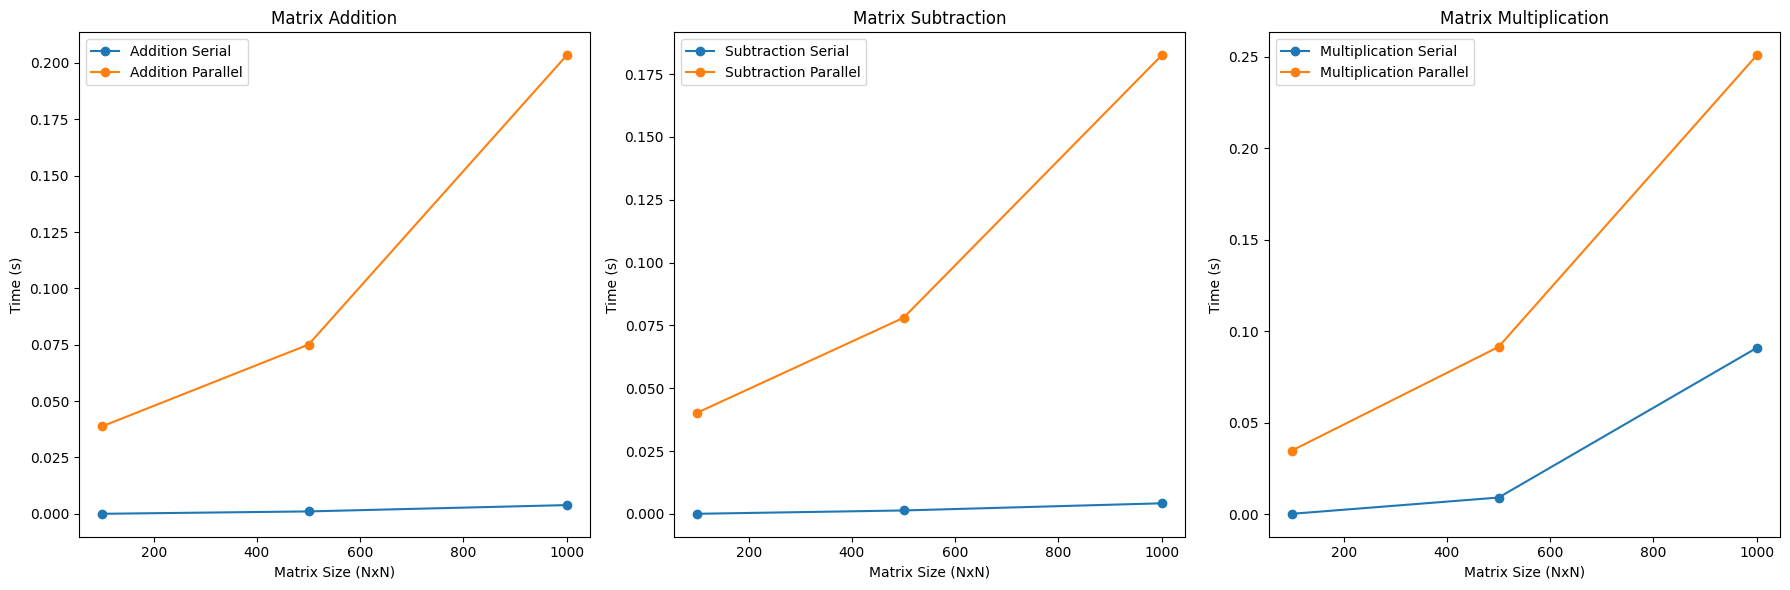

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool

# Matrix Addition (Serial)
def matrix_add_serial(A, B):
    return A + B

# Matrix Subtraction (Serial)
def matrix_sub_serial(A, B):
    return A - B

# Matrix Multiplication (Serial)
def matrix_mul_serial(A, B):
    return np.dot(A, B)

# Matrix Addition (Parallel)
def matrix_add_parallel(A, B):
    with Pool() as pool:
        result = pool.starmap(np.add, [(A, B)])
    return result[0]

# Matrix Subtraction (Parallel)
def matrix_sub_parallel(A, B):
    with Pool() as pool:
        result = pool.starmap(np.subtract, [(A, B)])
    return result[0]

# Matrix Multiplication (Parallel)
def matrix_mul_parallel(A, B):
    with Pool() as pool:
        result = pool.starmap(np.dot, [(A, B)])
    return result[0]

# Timing function
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

# Test matrices of varying sizes
sizes = [100, 500, 1000]
time_data = {
    "size": [],
    "add_serial": [],
    "add_parallel": [],
    "sub_serial": [],
    "sub_parallel": [],
    "mul_serial": [],
    "mul_parallel": [],
}

for size in sizes:
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    # Serial
    _, time_add_serial = measure_time(matrix_add_serial, A, B)
    _, time_sub_serial = measure_time(matrix_sub_serial, A, B)
    _, time_mul_serial = measure_time(matrix_mul_serial, A, B)

    # Parallel
    _, time_add_parallel = measure_time(matrix_add_parallel, A, B)
    _, time_sub_parallel = measure_time(matrix_sub_parallel, A, B)
    _, time_mul_parallel = measure_time(matrix_mul_parallel, A, B)

    # Store times
    time_data["size"].append(size)
    time_data["add_serial"].append(time_add_serial)
    time_data["add_parallel"].append(time_add_parallel)
    time_data["sub_serial"].append(time_sub_serial)
    time_data["sub_parallel"].append(time_sub_parallel)
    time_data["mul_serial"].append(time_mul_serial)
    time_data["mul_parallel"].append(time_mul_parallel)

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot Addition
ax[0].plot(time_data["size"], time_data["add_serial"], label="Addition Serial", marker='o')
ax[0].plot(time_data["size"], time_data["add_parallel"], label="Addition Parallel", marker='o')
ax[0].set_title("Matrix Addition")
ax[0].set_xlabel("Matrix Size (NxN)")
ax[0].set_ylabel("Time (s)")
ax[0].legend()

# Plot Subtraction
ax[1].plot(time_data["size"], time_data["sub_serial"], label="Subtraction Serial", marker='o')
ax[1].plot(time_data["size"], time_data["sub_parallel"], label="Subtraction Parallel", marker='o')
ax[1].set_title("Matrix Subtraction")
ax[1].set_xlabel("Matrix Size (NxN)")
ax[1].set_ylabel("Time (s)")
ax[1].legend()

# Plot Multiplication
ax[2].plot(time_data["size"], time_data["mul_serial"], label="Multiplication Serial", marker='o')
ax[2].plot(time_data["size"], time_data["mul_parallel"], label="Multiplication Parallel", marker='o')
ax[2].set_title("Matrix Multiplication")
ax[2].set_xlabel("Matrix Size (NxN)")
ax[2].set_ylabel("Time (s)")
ax[2].legend()

plt.tight_layout()
plt.show()



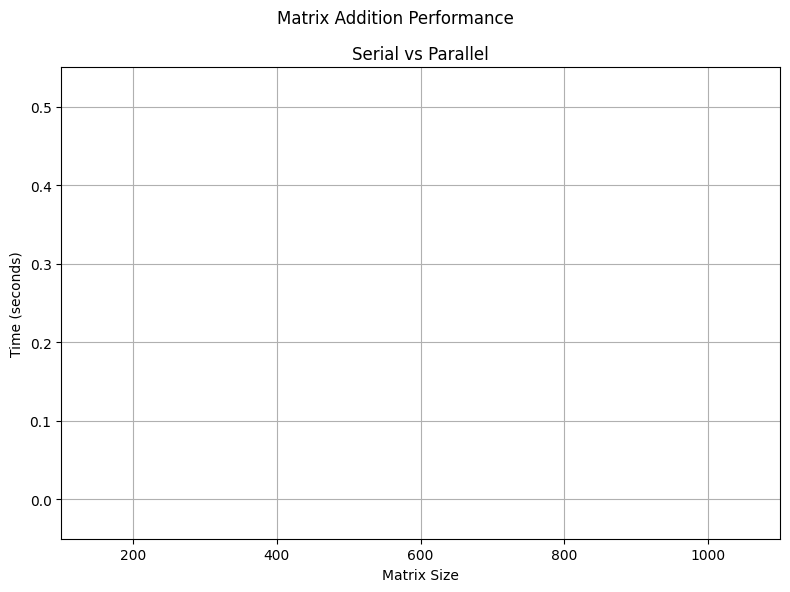

In [ ]:
import matplotlib.pyplot as plt

def empty_plot():
    """Generates an empty graph with margins on both axes for plotting data close to zero."""
    plt.figure(figsize=(8, 6))

    # Titles and labels
    plt.suptitle('Matrix Addition Performance')
    plt.title('Serial vs Parallel')
    plt.xlabel('Matrix Size')
    plt.ylabel('Time (seconds)')

    # Adjust ticks for x and y axes
    plt.xticks([200, 400, 600, 800, 1000])
    plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

    # Adding margins to both axes
    plt.xlim(100, 1100)  # Adjusted X-axis to match the matrix size range
    plt.ylim(-0.05, 0.55)  # Adjusted Y-axis to match the time range with margin

    # Show grid
    plt.grid(True)

    # Display the empty plot
    plt.tight_layout()
    plt.show()

# Generate the empty plot
empty_plot()